In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark import SparkContext , SparkConf
from pyspark.sql import SparkSession
from pyspark.rdd import RDD
plt.style.use('fivethirtyeight')

In [2]:
sc=SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

In [3]:
#data link: http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
data_file = "kddcup.data_10_percent"
raw_rdd = sc.textFile(data_file).cache()
raw_rdd.take(5)

['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.']

In [4]:
type(raw_rdd)

pyspark.rdd.RDD

In [5]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
sqlContext

In [6]:
csv_rdd = raw_rdd.map(lambda row: row.split(","))
print(csv_rdd.take(2))
print(type(csv_rdd))

[['0', 'tcp', 'http', 'SF', '181', '5450', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '9', '9', '1.00', '0.00', '0.11', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.'], ['0', 'tcp', 'http', 'SF', '239', '486', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '19', '19', '1.00', '0.00', '0.05', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']]
<class 'pyspark.rdd.PipelinedRDD'>


In [7]:
len(csv_rdd.take(1)[0])

42

In [8]:
from pyspark.sql import Row

parsed_rdd = csv_rdd.map(lambda r: Row(
    duration=int(r[0]),
    protocol_type=r[1],
    service=r[2],
    flag=r[3],
    src_bytes=int(r[4]),
    dst_bytes=int(r[5]),
    wrong_fragment=int(r[7]),
    urgent=int(r[8]),
    hot=int(r[9]),
    num_failed_logins=int(r[10]),
    num_compromised=int(r[12]),
    su_attempted=r[14],
    num_root=int(r[15]),
    num_file_creations=int(r[16]),
    label=r[-1]
    )
)
parsed_rdd.take(5)


[Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=181, dst_bytes=5450, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, num_compromised=0, su_attempted='0', num_root=0, num_file_creations=0, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=239, dst_bytes=486, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, num_compromised=0, su_attempted='0', num_root=0, num_file_creations=0, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=235, dst_bytes=1337, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, num_compromised=0, su_attempted='0', num_root=0, num_file_creations=0, label='normal.'),
 Row(duration=0, protocol_type='tcp', service='http', flag='SF', src_bytes=219, dst_bytes=1337, wrong_fragment=0, urgent=0, hot=0, num_failed_logins=0, num_compromised=0, su_attempted='0', num_root=0, num_file_creations=0, label='normal.'),
 Row(duration=0, protocol_type='tcp',

In [9]:
df = sqlContext.createDataFrame(parsed_rdd)

In [10]:
pd.DataFrame(df.toPandas().head(5))

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,0,0,0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,0,0,0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,0,0,0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,0,0,0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,0,0,0,normal.


In [11]:
type(df)

pyspark.sql.dataframe.DataFrame

In [12]:
df.printSchema()

root
 |-- duration: long (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: long (nullable = true)
 |-- dst_bytes: long (nullable = true)
 |-- wrong_fragment: long (nullable = true)
 |-- urgent: long (nullable = true)
 |-- hot: long (nullable = true)
 |-- num_failed_logins: long (nullable = true)
 |-- num_compromised: long (nullable = true)
 |-- su_attempted: string (nullable = true)
 |-- num_root: long (nullable = true)
 |-- num_file_creations: long (nullable = true)
 |-- label: string (nullable = true)



In [13]:
help(df.registerTempTable)

Help on method registerTempTable in module pyspark.sql.dataframe:

registerTempTable(name) method of pyspark.sql.dataframe.DataFrame instance
    Registers this DataFrame as a temporary table using the given name.
    
    The lifetime of this temporary table is tied to the :class:`SparkSession`
    that was used to create this :class:`DataFrame`.
    
    >>> df.registerTempTable("people")
    >>> df2 = spark.sql("select * from people")
    >>> sorted(df.collect()) == sorted(df2.collect())
    True
    >>> spark.catalog.dropTempView("people")
    
    .. note:: Deprecated in 2.0, use createOrReplaceTempView instead.
    
    .. versionadded:: 1.3



In [14]:
df.createOrReplaceTempView("mytable");

In [15]:
protocols = sqlContext.sql("""
                           SELECT protocol_type, count(*) as freq
                           FROM mytable
                           GROUP BY protocol_type
                           ORDER BY 2 DESC
                           """)

In [16]:
pd.DataFrame(protocols.toPandas().head(5))


,protocol_type,freq
0,icmp,283602
1,tcp,190065
2,udp,20354


In [17]:
labels = sqlContext.sql("""
                           SELECT label, count(*) as freq
                           FROM mytable
                           GROUP BY label
                           ORDER BY 2 DESC
                           """)


In [18]:
pd.DataFrame(labels.toPandas().head(5))


,label,freq
0,smurf.,280790
1,neptune.,107201
2,normal.,97278
3,back.,2203
4,satan.,1589


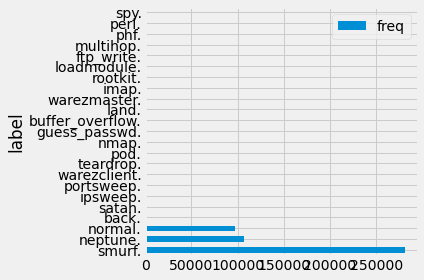

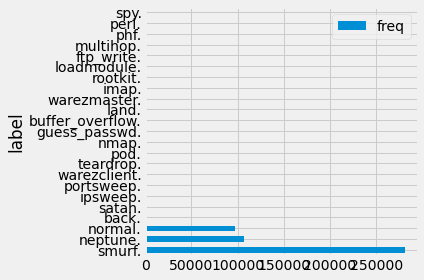

In [19]:
labels_df = pd.DataFrame(labels.toPandas())
labels_df.set_index("label", drop=True,inplace=True)
labels_fig = labels_df.plot(kind='barh')

plt.rcParams["figure.figsize"] = (7, 5)
plt.rcParams.update({'font.size': 10})
plt.tight_layout()
display(labels_fig.figure)

In [20]:
attack_protocol = sqlContext.sql("""
                           SELECT
                             protocol_type,
                             CASE label
                               WHEN 'normal.' THEN 'no attack'
                               ELSE 'attack'
                             END AS state,
                             COUNT(*) as freq
                           FROM mytable
                           GROUP BY protocol_type, state
                           ORDER BY 3 DESC
                           """)


In [21]:
pd.DataFrame(attack_protocol.toPandas().head(5))


,protocol_type,state,freq
0,icmp,attack,282314
1,tcp,attack,113252
2,tcp,no attack,76813
3,udp,no attack,19177
4,icmp,no attack,1288


In [22]:
attack_stats = sqlContext.sql("""
                           SELECT
                             protocol_type,
                             CASE label
                               WHEN 'normal.' THEN 'no attack'
                               ELSE 'attack'
                             END AS state,
                             COUNT(*) as total_freq,
                             ROUND(AVG(src_bytes), 2) as mean_src_bytes,
                             ROUND(AVG(dst_bytes), 2) as mean_dst_bytes,
                             ROUND(AVG(duration), 2) as mean_duration,
                             SUM(num_failed_logins) as total_failed_logins,
                             SUM(num_compromised) as total_compromised,
                             SUM(num_file_creations) as total_file_creations,
                             SUM(su_attempted) as total_root_attempts,
                             SUM(num_root) as total_root_acceses
                           FROM mytable
                           GROUP BY protocol_type, state
                           ORDER BY 3 DESC
                           """)

In [23]:
pd.DataFrame(attack_stats.toPandas().head(5))

,protocol_type,state,total_freq,mean_src_bytes,mean_dst_bytes,mean_duration,total_failed_logins,total_compromised,total_file_creations,total_root_attempts,total_root_acceses
0,icmp,attack,282314,932.14,0.00,0.00,0,0,0,0.0,0
1,tcp,attack,113252,9880.38,881.41,23.19,57,2269,76,1.0,152
2,tcp,no attack,76813,1439.31,4263.97,11.08,18,2776,459,17.0,5456
3,udp,no attack,19177,98.01,89.89,1054.63,0,0,0,0.0,0
4,icmp,no attack,1288,91.47,0.00,0.00,0,0,0,0.0,0


In [24]:
tcp_attack_stats = sqlContext.sql("""
                                   SELECT
                                     service,
                                     label as attack_type,
                                     COUNT(*) as total_freq,
                                     ROUND(AVG(duration), 2) as mean_duration,
                                     SUM(num_failed_logins) as total_failed_logins,
                                     SUM(num_file_creations) as total_file_creations,
                                     SUM(su_attempted) as total_root_attempts,
                                     SUM(num_root) as total_root_acceses
                                   FROM mytable
                                   WHERE protocol_type = 'tcp'
                                   AND label != 'normal.'
                                   GROUP BY service, attack_type
                                   ORDER BY total_freq DESC
                                   """)

In [25]:
pd.DataFrame(tcp_attack_stats.toPandas().head(5))

,service,attack_type,total_freq,mean_duration,total_failed_logins,total_file_creations,total_root_attempts,total_root_acceses
0,private,neptune.,101317,0.00,0,0,0.0,0
1,http,back.,2203,0.13,0,0,0.0,0
2,other,satan.,1221,0.00,0,0,0.0,0
3,private,portsweep.,725,1915.81,0,0,0.0,0
4,ftp_data,warezclient.,708,403.71,0,0,0.0,0


In [26]:
tcp_attack_stats2 = sqlContext.sql("""
                                   SELECT
                                     service,
                                     label as attack_type,
                                     COUNT(*) as total_freq,
                                     ROUND(AVG(duration), 2) as mean_duration,
                                     SUM(num_failed_logins) as total_failed_logins,
                                     SUM(num_file_creations) as total_file_creations,
                                     SUM(su_attempted) as total_root_attempts,
                                     SUM(num_root) as total_root_acceses
                                   FROM mytable
                                   WHERE (protocol_type = 'tcp'
                                          AND label != 'normal.')
                                   GROUP BY service, attack_type
                                   HAVING (mean_duration >= 50
                                           AND total_file_creations >= 5
                                           AND total_root_acceses >= 1)
                                   ORDER BY total_freq DESC
                                   """)

In [27]:
pd.DataFrame(tcp_attack_stats2.toPandas().head(5))

,service,attack_type,total_freq,mean_duration,total_failed_logins,total_file_creations,total_root_attempts,total_root_acceses
0,telnet,buffer_overflow.,21,130.67,0,15,0.0,5
1,telnet,loadmodule.,5,63.80,0,9,0.0,3
2,telnet,multihop.,2,458.00,0,8,0.0,93


In [28]:
tcp_attack_stats3 = sqlContext.sql("""
                                   SELECT
                                     t.service,
                                     t.attack_type,
                                     t.total_freq
                                   FROM
                                   (SELECT
                                     service,
                                     label as attack_type,
                                     COUNT(*) as total_freq,
                                     ROUND(AVG(duration), 2) as mean_duration,
                                     SUM(num_failed_logins) as total_failed_logins,
                                     SUM(num_file_creations) as total_file_creations,
                                     SUM(su_attempted) as total_root_attempts,
                                     SUM(num_root) as total_root_acceses
                                   FROM mytable
                                   WHERE protocol_type = 'tcp'
                                   AND label != 'normal.'
                                   GROUP BY service, attack_type
                                   ORDER BY total_freq DESC) as t
                                     WHERE t.mean_duration > 0
                                   """)

In [29]:
pd.DataFrame(tcp_attack_stats3.toPandas().head(5))

,service,attack_type,total_freq
0,http,back.,2203
1,private,portsweep.,725
2,ftp_data,warezclient.,708
3,ftp,warezclient.,307
4,other,portsweep.,260


In [30]:
a=(tcp_attack_stats.groupby('service')
                         .pivot('attack_type')
                         .agg({'total_freq':'max'})
                         .na.fill(0))


In [31]:
pd.DataFrame(a.toPandas().head(5))

,service,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,perl.,phf.,portsweep.,rootkit.,satan.,spy.,warezclient.,warezmaster.
0,telnet,0,21,0,53,0,1,1,5,2,197,1,3,0,2,5,1,2,0,0
1,ftp,0,1,2,0,0,1,0,1,2,104,0,0,0,3,1,1,0,307,2
2,auth,0,0,0,0,0,0,0,0,0,108,0,0,0,0,0,0,0,0,0
3,iso_tsap,0,0,0,0,0,0,0,0,0,115,0,0,0,0,0,0,0,0,0
4,systat,0,0,0,0,0,0,0,0,0,113,0,0,0,2,0,0,0,0,0
